In [1]:
import pandas as pd
import numpy as np
import xgboost as xg
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import fbeta_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_train = '/content/carvan_train.csv'
file_test = '/content/carvan_test.csv'
df_train = pd.read_csv(file_train)
df_test = pd.read_csv(file_test)

Printing the datasets for train and test and checking for nan values

In [3]:
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
3997,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
3998,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.isnull().values.any()

False

In [6]:
df_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


Getting dummies for columns with categorical data

In [7]:
data = df_train
new = pd.get_dummies(data, prefix=['V1', 'V5'], columns=['V1', 'V5'], dtype = int)
new

,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,...,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9,V5_10
0,1,3,2,0,5,1,3,7,0,2,...,0,0,0,0,0,0,0,1,0,0
1,1,2,2,1,4,1,4,6,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,2,2,0,4,2,4,3,2,4,...,0,0,0,0,0,0,0,1,0,0
3,1,3,3,2,3,2,4,5,2,2,...,0,0,1,0,0,0,0,0,0,0
4,1,4,2,1,4,1,4,7,1,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,1,2,0,6,1,2,1,2,6,...,0,0,0,0,0,0,0,1,0,0
5818,1,4,4,1,4,1,4,6,0,3,...,0,0,0,0,0,0,0,1,0,0
5819,1,3,4,0,6,0,3,5,1,4,...,0,0,0,0,0,0,0,1,0,0
5820,1,3,2,0,7,0,2,7,2,0,...,0,0,0,0,0,0,0,1,0,0


Rearranging the columns for convenience

In [8]:
columns = new.columns.values.tolist()
dummy_cols = columns[84::]
dummy_cols

['V1_1',
 'V1_2',
 'V1_3',
 'V1_4',
 'V1_5',
 'V1_6',
 'V1_7',
 'V1_8',
 'V1_9',
 'V1_10',
 'V1_11',
 'V1_12',
 'V1_13',
 'V1_15',
 'V1_16',
 'V1_17',
 'V1_18',
 'V1_19',
 'V1_20',
 'V1_21',
 'V1_22',
 'V1_23',
 'V1_24',
 'V1_25',
 'V1_26',
 'V1_27',
 'V1_28',
 'V1_29',
 'V1_30',
 'V1_31',
 'V1_32',
 'V1_33',
 'V1_34',
 'V1_35',
 'V1_36',
 'V1_37',
 'V1_38',
 'V1_39',
 'V1_40',
 'V1_41',
 'V5_1',
 'V5_2',
 'V5_3',
 'V5_4',
 'V5_5',
 'V5_6',
 'V5_7',
 'V5_8',
 'V5_9',
 'V5_10']

In [9]:
rest = data.drop(['V1','V5'], axis = 1)
new_data = pd.concat([new[dummy_cols], rest], axis = 1)
new_data

,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
new_data.describe()

,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,0.021299,0.014085,0.042769,0.008932,0.007729,0.020440,0.007558,0.058227,0.047750,0.028341,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,0.144390,0.117850,0.202353,0.094092,0.087584,0.141511,0.086612,0.234193,0.213255,0.165959,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [11]:
X = new_data.drop('V86', axis = 1)
y = new_data['V86']

In [12]:
y.value_counts()

V86
0    5474
1     348
Name: count, dtype: int64

Checking the imbalance and distribution

In [13]:
n_sample_0 = 5474
n_sample_1 = 348
centers = [(0, 0), (2, 2)]
cluster_std = [1.5, 1.5]

In [14]:
X, y = make_blobs(n_samples = [n_sample_0, n_sample_1],
                  centers = centers,
                  cluster_std = cluster_std,
                  random_state = 0)

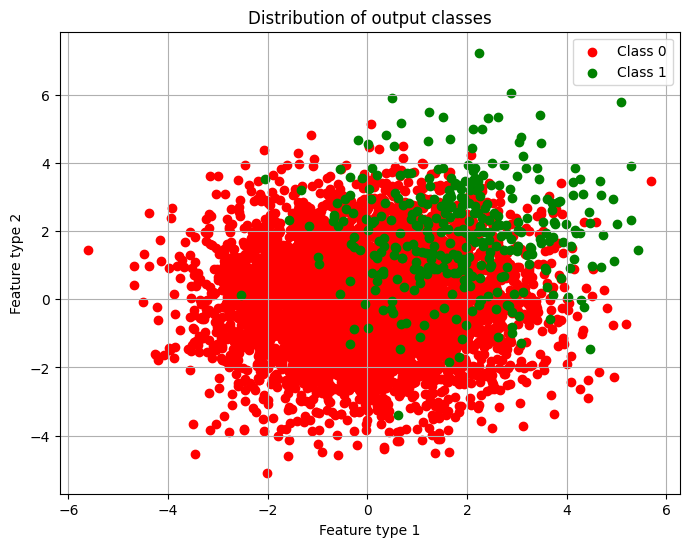

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'red', label = 'Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'green', label = 'Class 1')
plt.title('Distribution of output classes')
plt.xlabel('Feature type 1')
plt.ylabel('Feature type 2')
plt.legend()
plt.grid(True)
plt.show()

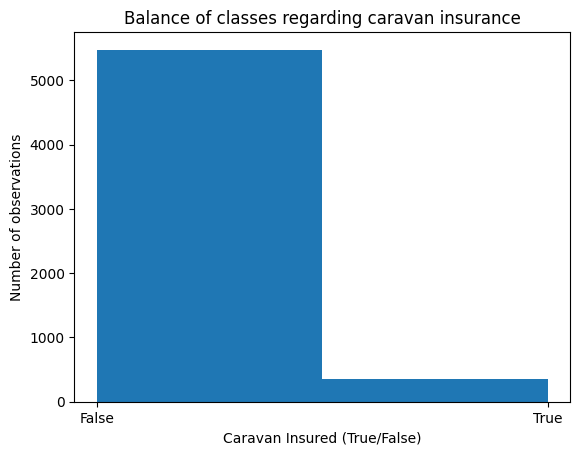

In [16]:
plt.hist(y, bins = 2)


plt.xlabel('Caravan Insured (True/False)')
plt.ylabel('Number of observations')
plt.title('Balance of classes regarding caravan insurance')
xtick_labels = ['False', 'True']
plt.xticks([0, 1], xtick_labels)


plt.show()

Stratifying the the train data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1, stratify = y)

In [18]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2737, 1: 174})
Counter({0: 2737, 1: 174})


Resampling the imbalanced data

In [19]:
smtt = SMOTETomek(random_state = 42)
X_train_rs, y_train_rs = smtt.fit_resample(X_train, y_train)

In [20]:
print(Counter(y_train_rs))

Counter({0: 2573, 1: 2573})


Rechecking the distribution

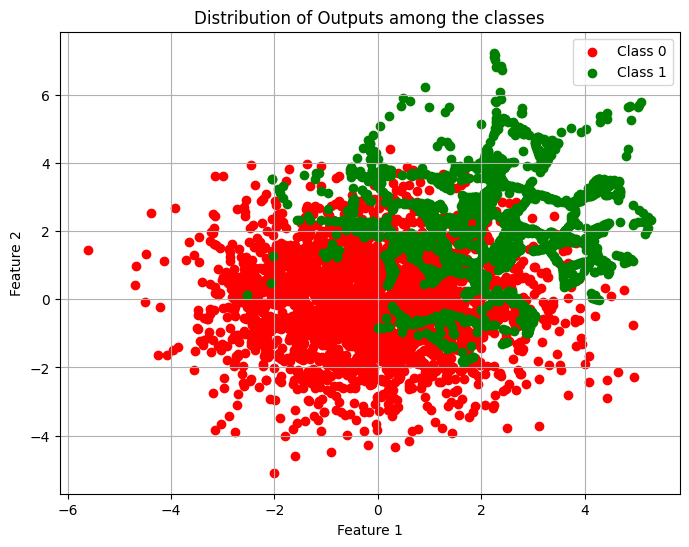

In [21]:
plt.figure(figsize = (8, 6))
plt.scatter(X_train_rs[y_train_rs == 0][:, 0], X_train_rs[y_train_rs == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train_rs[y_train_rs == 1][:, 0], X_train_rs[y_train_rs == 1][:, 1], color='green', label='Class 1')
plt.title('Distribution of Outputs among the classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

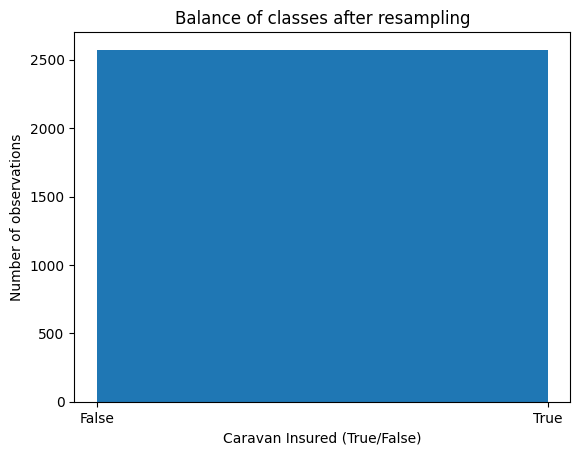

In [22]:
plt.hist(y_train_rs, bins = 2)


plt.xlabel('Caravan Insured (True/False)')
plt.ylabel('Number of observations')
plt.title('Balance of classes after resampling')
xtick_labels = ['False', 'True']
plt.xticks([0, 1], xtick_labels)


plt.show()

Defining models and parameters for GridSearch

In [23]:
model_params = {
    'Logistic_Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1, 5, 10],
            'penalty': ['l1','l2']
        }
    },
    'XGB_Classifier': {
        'model': xg.XGBClassifier(),
        'params' : {
        'n_estimators': [100, 500, 1000],
        'max_depth': [2, 5, 8],
        'learning_rate': [0.05, 0.1, 0.2],
        'min_child_weight': [2, 3, 4]
        }
    }
}

Checking the best parameters and suitable model

In [24]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 10, return_train_score = False)
    clf.fit(X_train_rs, y_train_rs)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_scores

,model,best_score,best_params
0,Logistic_Regression,0.84804,"{'C': 5, 'penalty': 'l2'}"
1,XGB_Classifier,0.92247,"{'learning_rate': 0.1, 'max_depth': 8, 'min_ch..."


In [26]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
train_score = clf.best_estimator_.predict_proba(X_train_rs)[:,1]
train_score

array([4.5121851e-05, 4.3333126e-05, 1.4647145e-03, ..., 9.8854125e-01,
       9.8538721e-01, 9.8218161e-01], dtype=float32)

In [28]:
y_pred = clf.best_estimator_.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
y_true = y_test
y_true

array([0, 0, 0, ..., 0, 0, 0])

Printing the respective scores of precison, recall and fbeta

In [30]:
p = precision_score(y_true, y_pred)
r = recall_score(y_true, y_pred)
f = fbeta_score(y_true, y_pred, beta = 2)
print('Respective Precision, Recall and Fbeta scores are: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

Respective Precision, Recall and Fbeta scores are: p=0.225, r=0.649, f=0.472


In [31]:
cutoffs = np.linspace(0.001,0.999,999)

In [32]:
fbetas = []
for cutoff in cutoffs:
  predicted = (train_score>cutoff).astype(int),
  fbetas.append(fbeta_score(y_true, y_pred, beta = 2))

In [33]:
my_cutoff = cutoffs[fbetas == max(fbetas)]

In [34]:
my_cutoff

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

In [35]:
test_data = df_test
new_test = pd.get_dummies(test_data, prefix=['V1', 'V5'], columns = ['V1', 'V5'], dtype = int)
new_test

,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,...,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9,V5_10
0,1,4,2,0,6,0,3,5,0,4,...,0,0,0,0,0,0,0,1,0,0
1,1,3,2,0,5,0,4,5,2,2,...,0,1,0,0,0,0,0,0,0,0
2,1,3,3,1,4,2,3,5,2,3,...,0,0,0,0,0,0,0,0,1,0
3,1,2,3,2,3,2,4,5,4,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2,4,0,2,0,7,9,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,2,4,0,7,2,0,5,2,2,...,0,0,0,0,0,0,0,1,0,0
3996,1,2,3,1,5,1,3,4,2,4,...,0,0,0,0,1,0,0,0,0,0
3997,1,2,3,1,5,1,3,7,0,2,...,0,0,0,0,0,0,0,1,0,0
3998,1,3,3,1,4,2,3,7,1,2,...,0,0,0,0,0,0,0,1,0,0


In [36]:
columns_test = new_test.columns.values.tolist()
dummy_cols_test = columns_test[83::]
dummy_cols_test

['V1_1',
 'V1_2',
 'V1_3',
 'V1_4',
 'V1_5',
 'V1_6',
 'V1_7',
 'V1_8',
 'V1_9',
 'V1_10',
 'V1_11',
 'V1_12',
 'V1_13',
 'V1_15',
 'V1_16',
 'V1_17',
 'V1_18',
 'V1_19',
 'V1_20',
 'V1_21',
 'V1_22',
 'V1_23',
 'V1_24',
 'V1_25',
 'V1_26',
 'V1_27',
 'V1_28',
 'V1_29',
 'V1_30',
 'V1_31',
 'V1_32',
 'V1_33',
 'V1_34',
 'V1_35',
 'V1_36',
 'V1_37',
 'V1_38',
 'V1_39',
 'V1_40',
 'V1_41',
 'V5_1',
 'V5_2',
 'V5_3',
 'V5_4',
 'V5_5',
 'V5_6',
 'V5_7',
 'V5_8',
 'V5_9',
 'V5_10']

In [37]:
non_dummy_cols = df_test.drop(['V1','V5'], axis = 1)
test_set = pd.concat([new_test[dummy_cols_test], non_dummy_cols], axis = 1)
test_set

,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,V1_9,V1_10,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_set_array = test_set.to_numpy()
test_set_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
test_set_array.shape

(4000, 133)

In [61]:
'''test_set_R = np.matrix(test_set_R)
X = np.matrix(X)
y = np.matrix(y)'''

'test_set_R = np.matrix(test_set_R)\nX = np.matrix(X)\ny = np.matrix(y)'

In [64]:
predictions = (clf.best_estimator_.predict_proba(test_set)[:,1]>my_cutoff).astype(int)
predictions

ValueError: Feature shape mismatch, expected: 2, got 133

In [ ]:
'''test_classes = (predictions > my_cutoff).astype(int)
test_classes'''

ValueError: operands could not be broadcast together with shapes (266000,) (999,) 

In [ ]:
'''pd.Series(predictions).value_counts()'''

0.011292    166363
0.000876      9972
0.000647      8927
0.978357      8374
0.909850      6453
0.998375      5079
0.986718      3928
0.999357      3865
0.154476      3682
0.999988      3635
0.999777      3383
0.996286      3232
0.999988      3122
0.319630      2887
0.929803      2832
0.199648      2701
0.976074      2486
0.894833      2451
0.998841      2444
0.897120      2374
0.996234      2262
0.983192      2258
0.993106      2197
0.014717      1760
0.937106      1753
0.999902      1698
0.020065      1659
0.999760      1647
0.999897      1293
0.995989      1283
Name: count, dtype: int64

In [ ]:
'''submissions = pd.DataFrame({'V86':predictions})'''

In [ ]:
'''submissions.to_csv('sample_submission.csv',index=False)'''